In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

DEFINE STATE

In [28]:
class TemperatureConverter(TypedDict):
    temp: float
    from_unit: str
    to_unit: str
    result: float
    comment: str

DEFINE FUNCTIONS

In [29]:
def temperature_converter(state: TemperatureConverter) -> TemperatureConverter:
    temp = state['temp']
    from_unit = state['from_unit']
    to_unit = state['to_unit']
    
    if from_unit == 'C' and to_unit == 'F':
        state['result'] = (temp * 9/5) + 32
    elif from_unit == 'F' and to_unit == 'C':
        state['result'] = (temp - 32) * 5/9
    else:
        raise ValueError("Unsupported unit conversion")
    
    return state

In [30]:
def comment(state: TemperatureConverter) -> TemperatureConverter:
    fetchState = state["temp"]
    result = state["result"]

    if fetchState == "C" and  result >= 100:
        state["comment"] = "TOO MUCH HOT"
    elif fetchState == "C" and result <= 100:
        state["comment"] = "VALID TEMPERATURE"
    elif fetchState == "F" and result >= 212:
        state["comment"] = "TOO MUCH HOT"
    elif fetchState == "F" and result <= 212:
        state["comment"] = "VALID TEMPERATURE"
    
    return state

DEFINE GRAPH

In [31]:
graph = StateGraph(TemperatureConverter)

ADD NODES

In [32]:
graph.add_node("temperature_converter", temperature_converter)
graph.add_node("comment", comment)

ADD EDGES

In [33]:
graph.add_edge(START, "temperature_converter")
graph.add_edge("temperature_converter", "comment")
graph.add_edge("comment", END)

COMPILE GRAPH

In [34]:
workflow = graph.compile()

EXECUTE PHASE

In [35]:
initail_state = {
    'temp': 100,
    'from_unit': 'C',
    'to_unit': 'F'
}
final_state = workflow.invoke(initail_state)
print(final_state)

{'temp': 100, 'from_unit': 'C', 'to_unit': 'F', 'result': 212.0}


VISUALIZATION

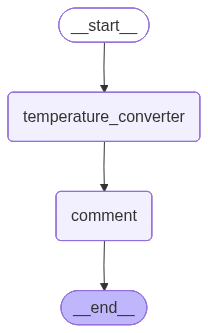

In [36]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())